DATA ANALYSIS FOR SALARIES OF SAN FRANCISCO EMPLOYEE DATASET

In [2]:
#IMPORTING NECCESARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#LOADING THE DATASET
dt = pd.read_csv("E:\\coding\\venv\\DA PROJECTS\\CLONE\\DATA-ANALYSIS----SSFE\Total.csv")

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\DELL\AppData\Local\Temp\ipykernel_3748\226618271.py:2: SyntaxWarning: invalid escape sequence '\T'
  dt = pd.read_csv("E:\\coding\\venv\\DA PROJECTS\\CLONE\\DATA-ANALYSIS----SSFE\Total.csv")
C:\Users\DELL\AppData\Local\Temp\ipykernel_3748\226618271.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv("E:\\coding\\venv\\DA PROJECTS\\CLONE\\DATA-ANALYSIS----SSFE\Total.csv")


Objective:
 The project aims to analyze employee compensation data, including BasePay,
 OvertimePay, OtherPay, Benefits, and their relation to TotalPay and TotalPayBenefits.
 This is achieved through Exploratory Data Analysis (EDA) and Visualization using
 Python

In [4]:
dt.head()  # Display the first few rows of the dataset

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [6]:
dt.shape

(312882, 9)

FEATURE ENGINEERING

In [7]:
#CHANGING DATA TYPES OF THE COLUMNS 
c_name = ['BasePay','OvertimePay','OtherPay','Benefits']
for i in c_name:
    dt[i] = pd.to_numeric(dt[i], errors='coerce')

In [8]:
dt.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [10]:
dt.isnull().sum() # Check for missing values in the dataset

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [11]:
#RECORDS WITH THE NULL VALUESS
dt[dt.isnull().any(axis=1)]  

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
110527,Nereida Vega,Senior Clerk,NaN,0.00,5.56,0.00,5.56,5.56,2013
110528,Timothy E Gibson,Police Officer 3,NaN,0.00,0.00,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.00,0.00,-8.20,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,NaN,0.00,0.00,-33.89,0.00,-33.89,2013


HERE, BENEFITS COLUMNS HAVING  NULL VALUES SINGNIFIES - NO BENEFIT 

In [12]:
#FILLING NULL VALUES OF BENEFITS COLUMNS WITH 0
dt.fillna({'Benefits': 0}, inplace=True)
dt.isnull().sum()  # Check for missing values again

EmployeeName          0
JobTitle              0
BasePay             606
OvertimePay           1
OtherPay              1
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [13]:
dt[dt.isnull().any(axis=1)] # Display rows with missing values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
81391,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013
84506,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013
84960,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013
90525,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013
...,...,...,...,...,...,...,...,...,...
110527,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.00,5.56,5.56,2013
110528,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013
110530,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013


RECORDS HAVING NAN VALUES IN BASEPAY FIELD ALSO SIGNIFIES 0 BASEPAY

In [14]:
#FILLING 0 TO ALL RECORDS HAVING NAN VALUES IN BASEPAY FIELD
dt.fillna({'BasePay': 0}, inplace=True)
dt.isnull().sum()  # Check for missing values again

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         1
OtherPay            1
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [15]:
dt[dt.isnull().any(axis=1)]  # Display rows with missing values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
229000,Not provided,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2016


THIS RECORD HAS ZERO INFORMATION. SO, WE GONNA DROP IT

In [16]:
dt.dropna(inplace=True)  # Drop rows with any remaining NaN values
dt.isnull().sum()  # Check for missing values again

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

EDA

STATISTICAL ANALYSIS

In [17]:
dt.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312881.000000,312881.000000,312881.000000,312881.000000,312881.000000,312881.000000,312881.000000
mean,69673.273282,5668.929393,3460.694974,22125.764705,78802.897649,100928.662355,2014.625298
std,45436.648607,12745.655309,7387.263120,16289.162102,53230.657179,66485.047895,2.290902
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35342.980000,0.000000,0.000000,2079.310000,38803.270000,48956.010000,2013.000000
50%,67646.120000,0.000000,728.000000,26771.570000,74908.860000,100011.360000,2015.000000
75%,99236.670000,5223.120000,3958.680000,34288.850000,111387.250000,142376.320000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


Upon reviewing the provided statistics, it's evident that the minimum values for each type of pay are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

s# filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

In [18]:
#filtering the records for only positive values
dt = dt[dt['TotalPay'] > 0]
dt = dt[dt['BasePay'] > 0]
dt = dt[dt['OvertimePay'] > 0]
dt = dt[dt['OtherPay'] > 0]
dt = dt[dt['Benefits'] > 0]
dt = dt[dt['TotalPayBenefits'] > 0]

In [27]:
# removing outliers using interquartile range for the numerical variables
for col in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']:
    Q1 = dt[col].quantile(0.25)
    Q3 = dt[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    dt = dt[(dt[col] >= lower_bound) & (dt[col] <= upper_bound)]

We're interested on exploring the Basepay,OvertimePay,Otherpay,Benefits and their relationship with Totalpay and

To investigate this, we'll plot line chart to visualize the distribution of compensation data over years and scatterplot to visualize their relation with TotalPay and TotalpayBenefits .

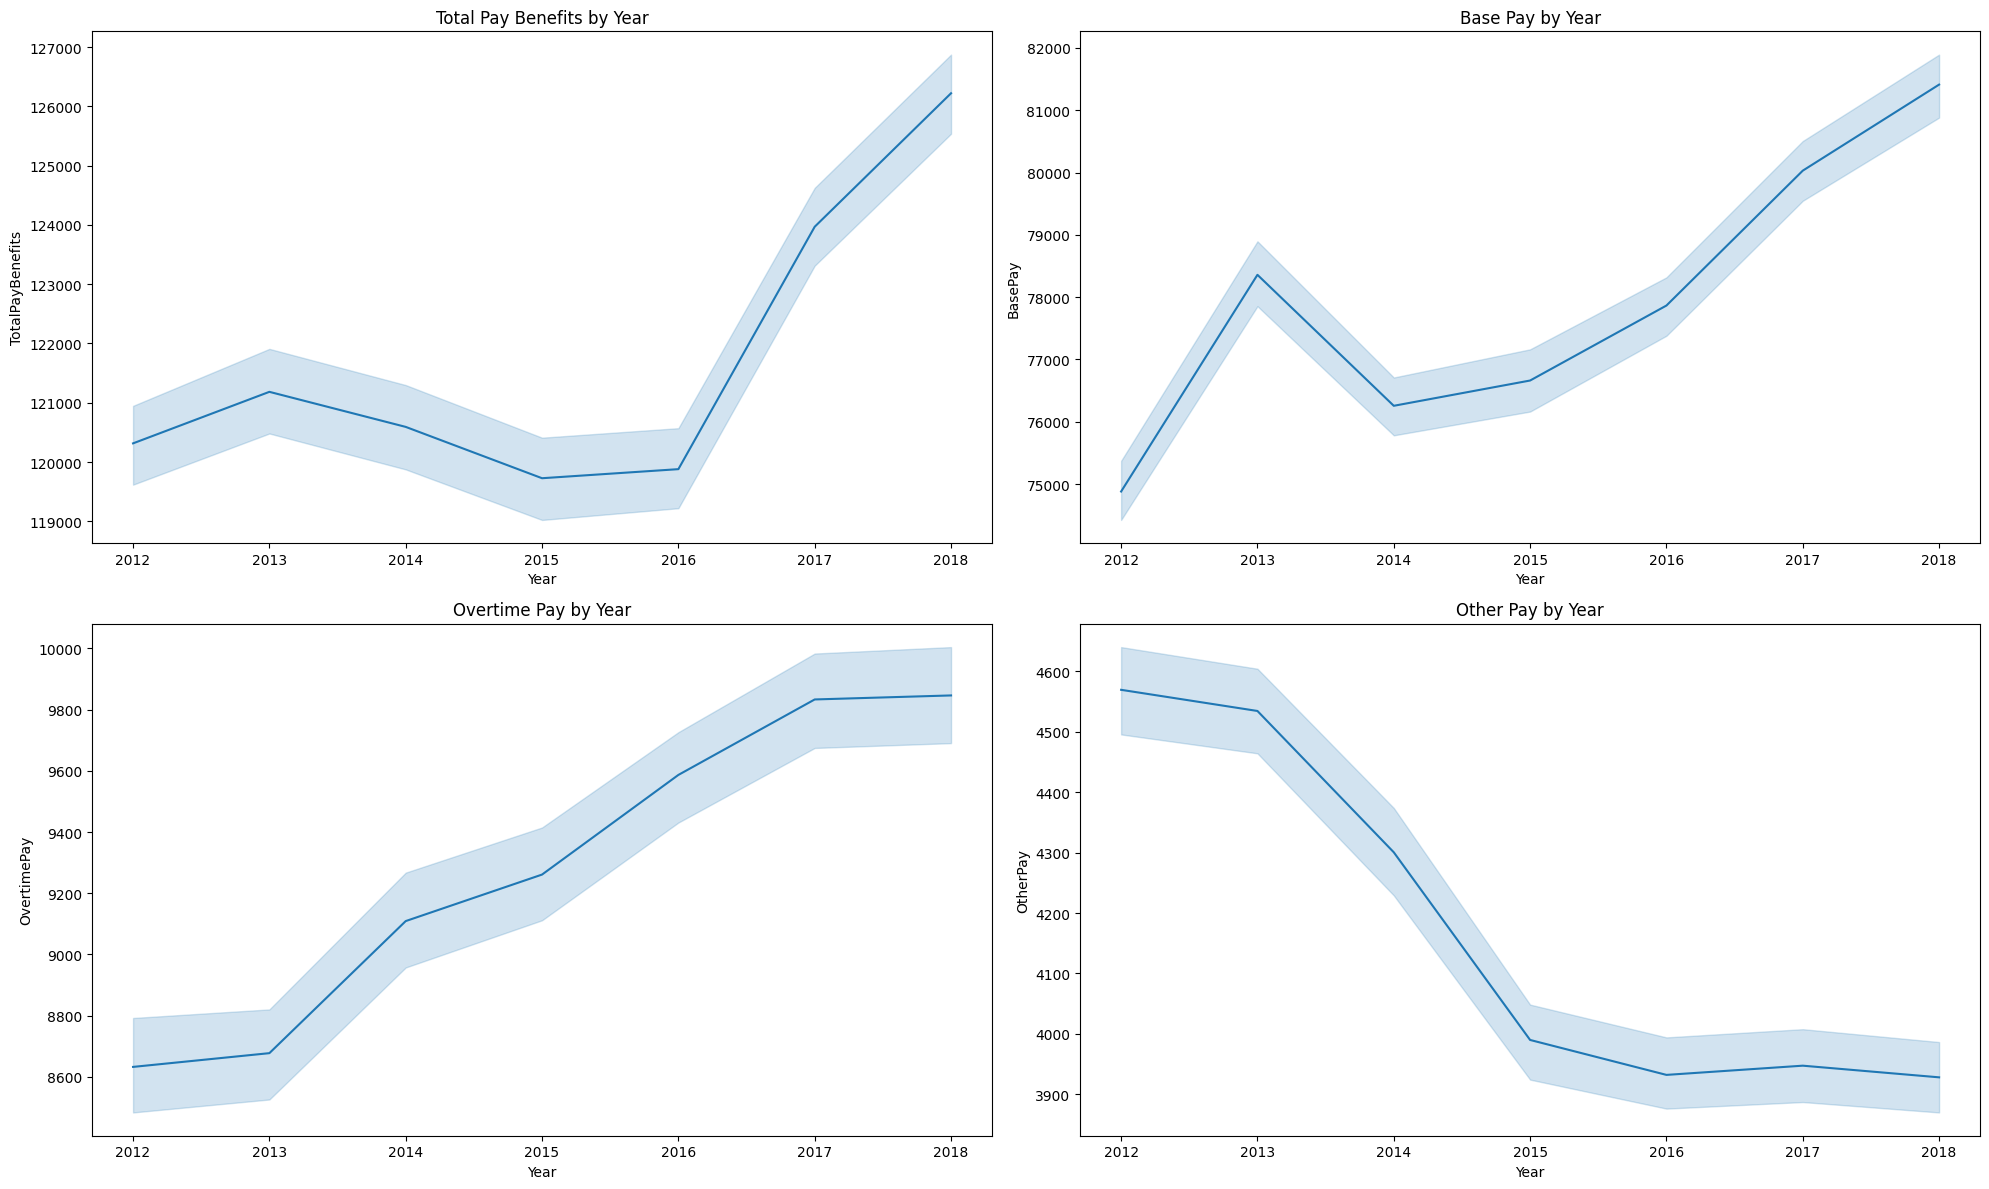

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

sns.lineplot(data=dt, x='Year', y='TotalPayBenefits', ax=axs[0, 0])
axs[0, 0].set_title('Total Pay Benefits by Year')

sns.lineplot(data=dt, x='Year', y='BasePay', ax=axs[0, 1])
axs[0, 1].set_title('Base Pay by Year')

sns.lineplot(data=dt, x='Year', y='OvertimePay', ax=axs[1, 0])
axs[1, 0].set_title('Overtime Pay by Year')

sns.lineplot(data=dt, x='Year', y='OtherPay', ax=axs[1, 1])
axs[1, 1].set_title('Other Pay by Year')

plt.tight_layout()
plt.show()

In [20]:
#UNIQUEJOB TITLES
unique_job_titles = dt['JobTitle'].unique()
print(f"Number of unique job titles: {len(unique_job_titles)}")

Number of unique job titles: 755


In [21]:
#JOBTITLES WITH THE MOST TAOTAL PAY BENEFITS IN DESCENDING ORDER
dt.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)

JobTitle
Supervising Physician Spec        361157.245000
Asst Med Examiner                 345015.194000
Asst Chf of Dept (Fire Dept)      345011.485122
Assistant Deputy Chief 2          323983.580000
Chief Deputy Sheriff (PERS)       322317.294286
Battalion Chief, Fire Suppress    312377.522487
Senior Physician Specialist       304450.746000
Emergency Medical Svcs Chief      301149.735000
Dep Chf of Dept (Fire Dept)       294131.022500
Assistant Sheriff                 291632.325000
Name: TotalPayBenefits, dtype: float64

In [22]:
dt.shape

(120664, 9)

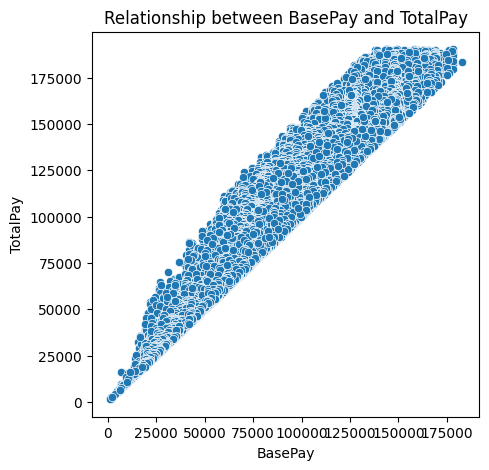

In [29]:
# Scatter plot to show relationship between TotalPay and BasePay
plt.figure(figsize=(5,5))
sns.scatterplot(data=dt, x='BasePay', y='TotalPay')
plt.title('Relationship between BasePay and TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

The scatter plot between **BasePay** and **TotalPay** shows how an employee’s base salary relates to their total compensation. If the points form a straight line, it means TotalPay is mostly determined by BasePay. If the points are spread out above the line, it suggests that other components (like OvertimePay, OtherPay, Benefits) significantly add to TotalPay for some employees. Outliers or clusters may indicate roles or years with unusually high extra pay. Generally, a positive correlation is expected, but the spread reveals the impact of additional pay elements.

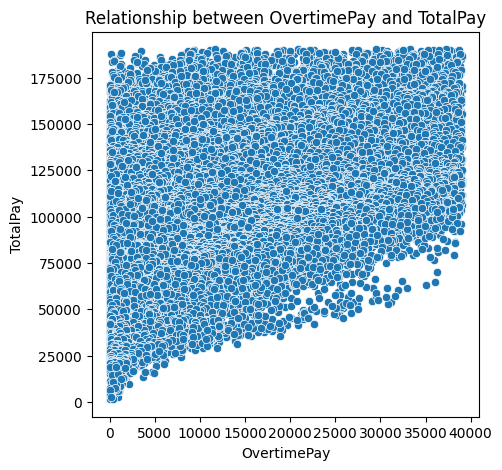

In [30]:
# Scatter plot to show relationship between OvertimePay and TotalPay
plt.figure(figsize=(5,5))
sns.scatterplot(data=dt, x='OvertimePay', y='TotalPay')
plt.title('Relationship between OvertimePay and TotalPay')
plt.xlabel('OvertimePay')
plt.ylabel('TotalPay')
plt.show()

The scatter plot between **OvertimePay** and **TotalPay** shows how extra earnings from overtime contribute to overall compensation. A positive trend means that as OvertimePay increases, TotalPay also rises. The spread of points indicates that some employees receive much higher TotalPay due to significant overtime, while others have low or no overtime. This highlights the strong impact of overtime work on total earnings, especially for roles or periods with more overtime opportunities.

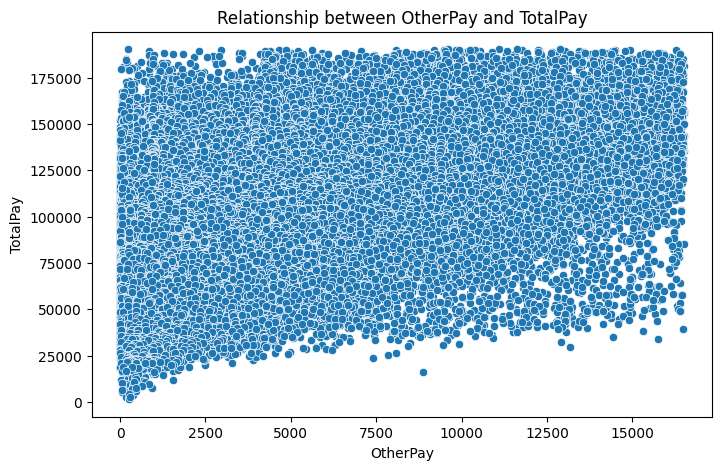

In [31]:
# Scatter plot to show relationship between OtherPay and TotalPay
plt.figure(figsize=(8,5))
sns.scatterplot(data=dt, x='OtherPay', y='TotalPay')
plt.title('Relationship between OtherPay and TotalPay')
plt.xlabel('OtherPay')
plt.ylabel('TotalPay')
plt.show()

The scatter plot between **OtherPay** and **TotalPay** shows how additional earnings (such as bonuses or allowances) contribute to overall compensation. If the points show a positive trend, it means that higher OtherPay is associated with higher TotalPay. However, the spread of points indicates that for many employees, OtherPay is a small part of TotalPay, while for some, it can significantly increase their total earnings. This suggests that OtherPay can be an important factor for certain roles or individuals, but it is not the main driver of TotalPay for most employees.